In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rn
import seaborn as sns

# visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
crime_data = pd.read_csv('/home/otavio/ml/datasets/World_Data/crime_index_by_countries.csv')
den_data = pd.read_csv('/home/otavio/ml/datasets/World_Data/pupulation_density_by_countries.csv')

In [3]:
print(crime_data.head())
print('-'*10)
print(crime_data.info())
print('-'*10)
print(crime_data.describe())

            Country  Crime Index  Safety Index
0         Venezuela        84.49         15.51
1  Papua New Guinea        81.93         18.07
2      South Africa        77.49         22.51
3       Afghanistan        76.23         23.77
4          Honduras        76.11         23.89
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       129 non-null    object 
 1   Crime Index   129 non-null    float64
 2   Safety Index  129 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB
None
----------
       Crime Index  Safety Index
count   129.000000    129.000000
mean     44.222481     55.777519
std      15.690481     15.690481
min      11.860000     15.510000
25%      31.830000     45.210000
50%      43.710000     56.290000
75%      54.790000     68.170000
max      84.490000     88.140000


In [4]:
print(den_data.head())
print('-'*10)
print(den_data.info())
print('-'*10)
print(den_data.describe())

  Rank Country (or dependent territory) Area km2 Area mi2 Population  \
0    –                            Macau    32.90       13   6,76,100   
1    1                           Monaco     2.02     0.78     38,300   
2    2                        Singapore    722.5      279  57,03,600   
3    –                        Hong Kong    1,106      427  75,00,700   
4    –                   Gibraltar (UK)      6.8      2.6     33,701   

  Density pop./km2 Density pop./mi2                Date  \
0           20,550           53,224  September 30, 2019   
1           18,960           49,106   December 31, 2018   
2            7,894           20,445        July 1, 2019   
3            6,782           17,565   December 31, 2019   
4            4,956           12,836        July 1, 2019   

             Population source  
0  Official quarterly estimate  
1            Official estimate  
2            Official estimate  
3            Official estimate  
4                UN projection  
----------
<cl

In [5]:
crime_data = crime_data.drop('Safety Index', axis=1)
crime_data = crime_data.rename(columns={'Crime Index': 'Crime_Index'})
crime_data

,Country,Crime_Index
0,Venezuela,84.49
1,Papua New Guinea,81.93
2,South Africa,77.49
3,Afghanistan,76.23
4,Honduras,76.11
...,...,...
124,Japan,20.66
125,Georgia,20.21
126,United Arab Emirates,15.70
127,Taiwan,15.65


In [6]:
den_data = den_data.rename(columns={'Country (or dependent territory)': 'Country', 'Density pop./km2':'Density'})
den_data = den_data[['Country', 'Density', 'Population']]
den_data

,Country,Density,Population
0,Macau,"20,550","6,76,100"
1,Monaco,"18,960","38,300"
2,Singapore,"7,894","57,03,600"
3,Hong Kong,"6,782","75,00,700"
4,Gibraltar (UK),"4,956","33,701"
...,...,...,...
246,Mongolia,1.9,"30,00,000"
247,Pitcairn Islands (UK),1.2,56
248,Falkland Islands (UK),0.21,"2,563"
249,Svalbard and Jan Mayen (Norway),0.04,"2,655"


In [7]:
data = crime_data.merge(den_data, how='inner', on=['Country'])
data

,Country,Crime_Index,Density,Population
0,Venezuela,84.49,35,"3,22,19,521"
1,Papua New Guinea,81.93,19,"89,35,000"
2,South Africa,77.49,48,"5,87,75,022"
3,Afghanistan,76.23,49,"3,15,75,018"
4,Honduras,76.11,81,"91,58,345"
...,...,...,...,...
119,Japan,20.66,333,"12,60,10,000"
120,Georgia,20.21,54,"37,29,600"
121,United Arab Emirates,15.70,117,"97,70,529"
122,Taiwan,15.65,652,"2,36,04,265"


In [8]:
data['Density'] = data['Density'].apply(lambda x: np.log(float(x.replace(',', ''))))

In [9]:
data = data[data.Density < 1000.0]

In [10]:
data = data.sort_values(['Density'])
data

,Country,Crime_Index,Density,Population
26,Mongolia,57.97,0.641854,"30,00,000"
9,Namibia,67.21,1.064711,"24,13,643"
67,Australia,41.36,1.098612,"2,56,49,909"
111,Iceland,23.36,1.252763,"3,60,390"
8,Guyana,67.66,1.280934,"7,82,225"
...,...,...,...,...
33,Maldives,53.21,7.137278,"3,74,775"
78,Malta,39.04,7.319865,"4,93,559"
97,Bahrain,29.29,7.592366,"15,43,300"
118,Hong Kong,20.70,8.822027,"75,00,700"


In [1]:
plt.figure(figsize=(16, 9))
plt.scatter(data['Density'], data['Crime_Index'])
plt.ylabel('Criminalidade')
plt.xlabel('Densidade')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("out.png")
plt.show()

NameError: name 'plt' is not defined

In [12]:
data['Population'] = data['Population'].apply(lambda x:  np.log(int(x.replace(',', ''))))

In [13]:
ord_pop = data.sort_values(['Population'])
ord_pop

,Country,Crime_Index,Density,Population
111,Iceland,23.36,1.252763,12.794942
33,Maldives,53.21,7.137278,12.834081
15,Bahamas,62.86,3.332205,12.865844
101,Brunei,27.68,4.290459,12.951100
78,Malta,39.04,7.319865,13.109398
...,...,...,...,...
59,Pakistan,44.08,5.605802,19.204507
52,Indonesia,45.84,4.948760,19.406776
46,United States,47.20,3.526361,19.612999
64,India,43.32,6.025866,21.030701


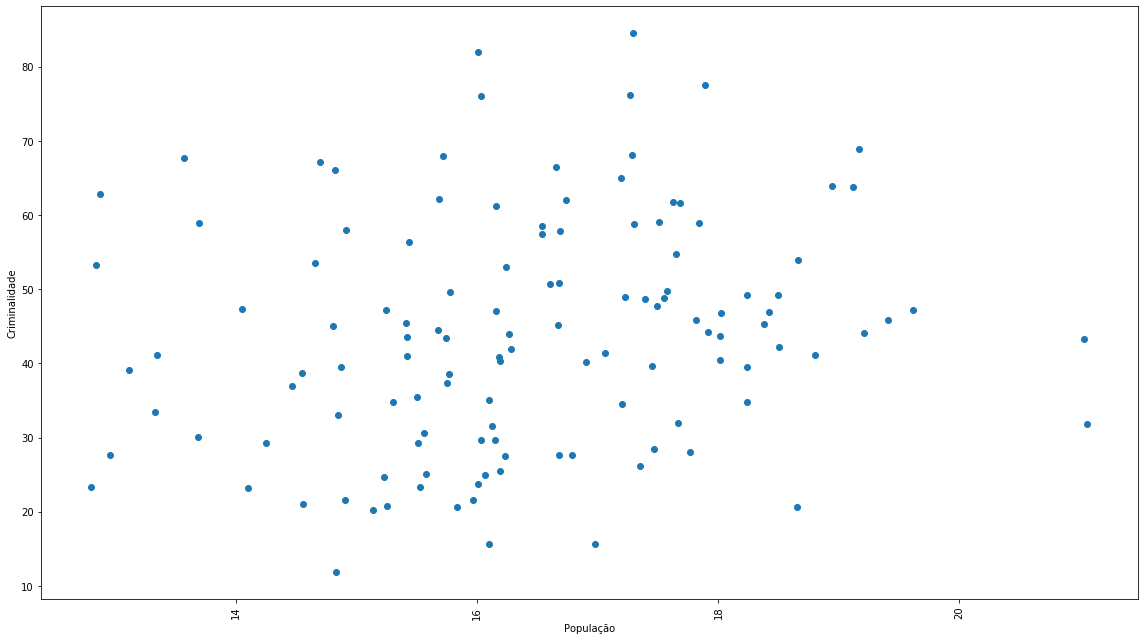

In [14]:
plt.figure(figsize=(16, 9))
plt.scatter(data['Population'], data['Crime_Index'])
plt.ylabel('Criminalidade')
plt.xlabel('População')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("pop.png")
plt.show()

In [17]:
data['DenxPop'] = np.log(data['Population'] * data['Density'])
new_data = data.sort_values('DenxPop')
new_data

,Country,Crime_Index,Density,Population,DenxPop
26,Mongolia,57.97,0.641854,14.914123,2.258914
9,Namibia,67.21,1.064711,14.696648,2.750323
111,Iceland,23.36,1.252763,12.794942,2.774401
8,Guyana,67.66,1.280934,13.569898,2.855443
67,Australia,41.36,1.098612,17.060051,2.930787
...,...,...,...,...,...
100,South Korea,28.02,6.248043,17.762526,4.709359
64,India,43.32,6.025866,21.030701,4.842045
13,Bangladesh,63.94,7.063904,18.941185,4.896336
93,Singapore,30.57,8.973858,15.556608,4.938801
